# Capitulo 6 - TensorFlow
## Construção de modelo de classificação de imagens com rede neural profunda (Deep Learning)

Nesse exemplo construiremos uma rede neural profunda para reconhecimento de dígitos, usando a API de alto nível disponível no tf.keras.  

Utilizaremos a base de dados MNIST, que contém 70.000 imagens rotuladas de dígitos escritos à mão, como visto na imagem a seguir:

1. Carregamento do conjunto de dados
2. Defininição dos atributos preditores e o atributo target 
3. Divisão dos conjuntos de dados para treino e teste

In [2]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 17s 1us/step


4. Pré-processamento dos dados <br/>
Conjuntos de dados são normalizados em um intervalo de 0 a 1. Para isso, convertemos o tipo de dado dos pixels da imagem de um inteiro para um float e dividimos por 255 (valor máximo de um pixel)

In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0

print (type(x_train))
print (x_train.shape)
print (x_test.shape)

<class 'numpy.ndarray'>
(60000, 28, 28)
(10000, 28, 28)


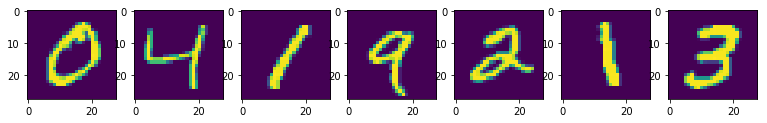

In [5]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig=plt.figure(figsize=(1, 8))
for i in range(1, 8):
    fig.add_subplot(1, 8, i)
    fig.set_figwidth(15)
    plt.imshow(x_train[i])
plt.show()

5. Criação da arquitetura da rede
Vamos criar a rede usando objeto model.Sequential do tf.keras

In [6]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

A primeira camada dessa rede, tf.keras.layers.Flatten, transforma o formato das imagens de uma matriz 2d (de 28 por 28 pixels), para uma matriz 1d de 28 * 28 = 784 pixels. Essa camada não precisa aprender nada, ele funciona simplesmente desempilhando as linhas de pixels na imagem e as alinhando em um vetor.

Depois da camada de Flatten temos uma camada tf.keras.layers.Dense. Este  tipo de camada é densamente conectada ou totalmente conectadas. Configuramos essa camada com 512 neurônio e a função de ativação ReLu. 

A próxima camada da rede, o tf.keras.layers.Dropout, permite configurar aleatoriamente que uma fração de neurônios da rede sejam "desativados" a cada época durante o treinamento. Isso ajudar a evitar o overfitting. Configuramos o Dropout com 0.2, ou seja a cada época 20%  dos neurônios são desativados.

A última camada é uma camada Densa com função de ativação softmax configurada com 10 neurônios. Dessa forma a saída dessa camada é uma  matriz de 10 "scores". Cada score indica a probabilidade da imagem pertencer a uma das 10 classes do conjunto de teste. 

5. Compilação a rede <br/>
Realiza a definição de alguns parametros que serão utilizados no treinamento: 

    * Função de perda (loss): função que mensura a precisão do modelo durante o treinamento. O treinamento deve minimizar essa função para "guiar" o modelo na direção certa.
 https://www.tensorflow.org/api_docs/python/tf/losses
 
    * Função de otimização (optimizer): função que atualiza os pesos do modelos para otimizar a função de perda (minimizar a perda). https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

    * Métricas (metrics): usadas para monitorar as etapas de treinamento e teste.  No exemplo usamos "accuracy", o percentual das imagens que são classificadas corretamente.
https://www.tensorflow.org/api_docs/python/tf/keras/metrics


In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  401920    
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense_1 (Dense)              multiple                  5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


6. Treinamento da rede <br/> Treinar o modelo de rede neural requer os seguintes passos: 

    1º Configurar o treinamento: trata-se da definição dados de treinamento (matrizes x_train e y_train) e quantidade de épocas (5). Existem outras configurações que podem ser definidas (https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential)

    2º Chamar o método fit passando as configurações do treinamento: esse procedimento inicia o treinamento do modelo que aprende a associar as imagens dos números e seus rótulos.

    3º Avaliar o resultado do treinamento: solicitamos ao modelo (model.evaluate()) que faça previsões com os dados de testes (matrizes x_test e y_test). Esse método retorna a taxa perda e "accuracy" do modelo usando os dados de teste. Outras métricas que forem definidas na compilação também serão retornadas. 

In [9]:
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
60000/60000 [==============================] - 17s 287us/sample - loss: 0.2223 - acc: 0.9357
Epoch 2/5
60000/60000 [==============================] - 18s 297us/sample - loss: 0.0973 - acc: 0.9698
Epoch 3/5
60000/60000 [==============================] - 18s 301us/sample - loss: 0.0685 - acc: 0.9786
Epoch 4/5
60000/60000 [==============================] - 18s 295us/sample - loss: 0.0541 - acc: 0.9825
Epoch 5/5
60000/60000 [==============================] - 17s 292us/sample - loss: 0.0435 - acc: 0.9855
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  401920    
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_______________________

[0.07722923343011062, 0.975]

7. Previsões

Com o modelo treinado, podemos usá-lo para fazer previsões sobre algumas imagens.

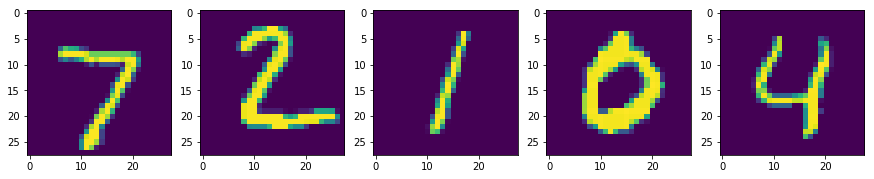

In [10]:
test_images = x_test[0:5]

fig=plt.figure(figsize=(1, test_images.shape[0]))
for i in range(1, test_images.shape[0]+1):
    fig.add_subplot(1, test_images.shape[0], i)
    fig.set_figwidth(15)
    plt.imshow(test_images[i-1])
plt.show()

Uma previsão é uma matriz de 10 números. Estes descrevem a "confiança" do modelo que a imagem corresponde a cada um dos 10 digitos. Podemos ver qual rótulo tem o maior valor de confiança:

In [14]:
predictions = model.predict(test_images)
for pred in predictions:
    print(np.round(pred))
    print(np.argmax(pred))

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
7
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
2
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
1
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
4


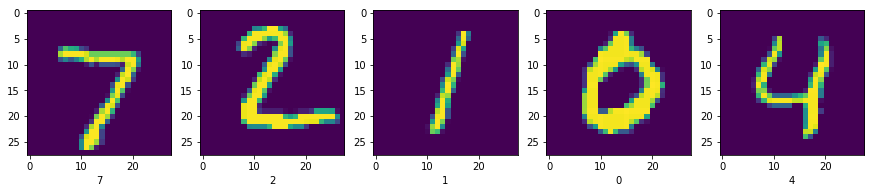

In [15]:
fig=plt.figure(figsize=(1, test_images.shape[0]))
for i in range(1, test_images.shape[0]+1):
    fig.add_subplot(1, test_images.shape[0], i)
    fig.set_figwidth(15)
    plt.imshow(test_images[i-1])
    plt.xlabel(np.argmax(predictions[i-1]))
plt.show()